This file takes the merged dataframe of ACS Data and NPI information for EDA


In [35]:
### Install if needed
# !pip install pgeocode
# !pip install censusgeocode

### Import Libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode as pg       #might not need here
import censusgeocode as cg  #might not need here
import matplotlib.patches as mpatches

In [2]:
### Import mergedTable
mergedTable = pd.read_pickle('mergedTableCounty.pkl')
# mergedTable.head()

In [3]:
### Import Census Tract Boundaries
tracts = gpd.read_file('Colorado_County_Boundaries.geojson')
# tracts

In [4]:
tracts

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry
0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069,"POLYGON ((-105.05673 40.34929, -105.05664 40.3..."
1,2,LAS ANIMAS,Las Animas County,Las Animas,071,71,37.315851,-104.038716,08071,"POLYGON ((-104.14319 37.75834, -104.14408 37.7..."
2,3,FREMONT,Fremont County,Fremont,043,43,38.472972,-105.439657,08043,"POLYGON ((-105.36890 38.25941, -105.36889 38.2..."
3,4,GUNNISON,Gunnison County,Gunnison,051,51,38.666798,-107.031700,08051,"POLYGON ((-106.79970 38.97966, -106.80041 38.9..."
4,5,CONEJOS,Conejos County,Conejos,021,21,37.200696,-106.191629,08021,"POLYGON ((-106.14888 37.40111, -106.15066 37.4..."
...,...,...,...,...,...,...,...,...,...,...
59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341..."
60,61,PARK,Park County,Park,093,93,39.119303,-105.717175,08093,"POLYGON ((-105.97509 38.91010, -105.97501 38.9..."
61,62,EL PASO,El Paso County,El Paso,041,41,38.832093,-104.525583,08041,"POLYGON ((-104.86403 39.12980, -104.86450 39.1..."
62,63,ARAPAHOE,Arapahoe County,Arapahoe,005,5,39.649772,-104.339219,08005,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989..."


In [11]:
tracts = tracts.rename(columns={'US_FIPS': 'County', 'FULL': 'County Name'})
tracts = tracts[['County', 'County Name', 'geometry']]
tracts

,County,County Name,geometry
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3..."
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7..."
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2..."
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9..."
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4..."
...,...,...,...
59,08031,Denver County,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341..."
60,08093,Park County,"POLYGON ((-105.97509 38.91010, -105.97501 38.9..."
61,08041,El Paso County,"POLYGON ((-104.86403 39.12980, -104.86450 39.1..."
62,08005,Arapahoe County,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989..."


In [12]:
### Add Census Boundaries to mergedTable
mergedTableBounds = pd.merge(tracts, mergedTable, on = ['County', 'County Name'], how = 'left')
mergedTableBounds.head() 

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,High,Very High,Medium,Very High,Very Low,Medium,...,Low,Low,Very Low,Medium,Medium,Low,Medium,Medium,Low,Low
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,Very Low,Low,Very Low,Very High,High,High,...,High,High,High,High,Low,High,Very High,Very Low,Very High,Very High
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",2.0,Low,Low,Low,High,Low,High,...,High,Medium,Very High,Very High,Very Low,Very High,High,Low,High,High
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(type(mergedTableBounds))
length = len(mergedTableBounds)
print(length)

<class 'geopandas.geodataframe.GeoDataFrame'>
64


Update columns for Correlation Mapping

In [15]:
corrDF = mergedTableBounds.copy()
corrDF = corrDF.drop(columns=['County', 'County Name', 'geometry'])

ordinalMap = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

binColumns = [col for col in corrDF.columns if col.endswith('Bins')]
for col in binColumns:
    corrDF[col] = corrDF[col].replace(ordinalMap).astype('float')

corrDF = corrDF.dropna()

Correlation Map

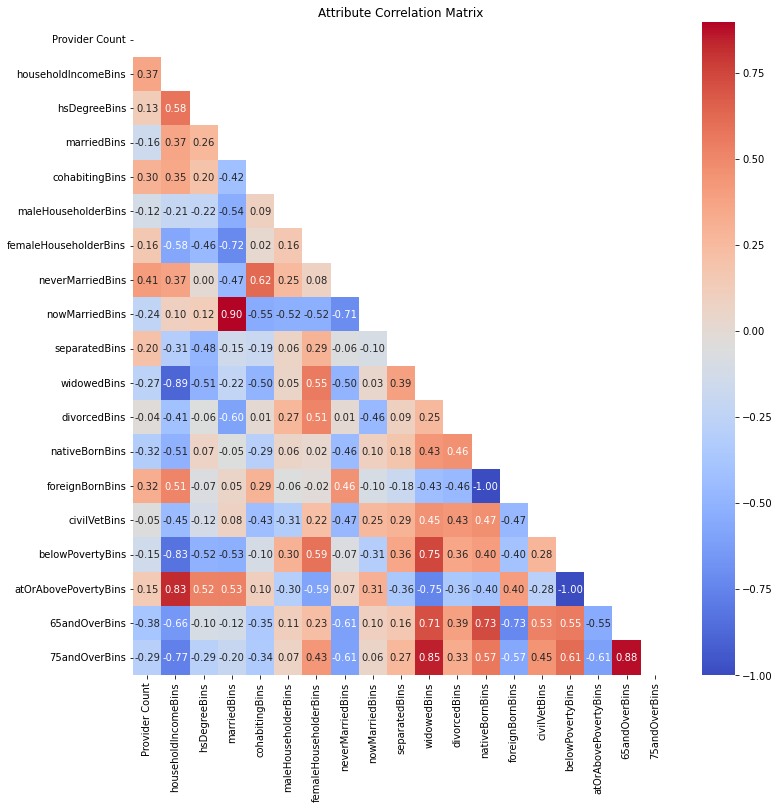

In [16]:
corrMatrix = corrDF.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Attribute Correlation Matrix')
plt.show()

In [17]:
corrMatrix

,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,neverMarriedBins,nowMarriedBins,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
Provider Count,1.000000,0.368417,0.128929,-0.161074,0.300894,-0.122393,0.159351,0.409261,-0.243538,0.202389,-0.265508,-0.036999,-0.318244,0.318244,-0.045879,-0.146198,0.146198,-0.379619,-0.293700
householdIncomeBins,0.368417,1.000000,0.579003,0.369755,0.351782,-0.213958,-0.576071,0.370707,0.096917,-0.305398,-0.886205,-0.411897,-0.511296,0.511296,-0.452367,-0.827873,0.827873,-0.656133,-0.769063
hsDegreeBins,0.128929,0.579003,1.000000,0.263016,0.195186,-0.222635,-0.459761,0.004872,0.122973,-0.481955,-0.511359,-0.056501,0.069613,-0.069613,-0.116639,-0.518684,0.518684,-0.097831,-0.287830
marriedBins,-0.161074,0.369755,0.263016,1.000000,-0.421503,-0.537963,-0.722847,-0.466387,0.895547,-0.153618,-0.223695,-0.597130,-0.052894,0.052894,0.076964,-0.526478,0.526478,-0.119822,-0.204413
cohabitingBins,0.300894,0.351782,0.195186,-0.421503,1.000000,0.091463,0.017748,0.623184,-0.552404,-0.191729,-0.496796,0.005076,-0.291427,0.291427,-0.434786,-0.104860,0.104860,-0.348728,-0.338290
maleHouseholderBins,-0.122393,-0.213958,-0.222635,-0.537963,0.091463,1.000000,0.163452,0.250062,-0.519787,0.059597,0.052823,0.269309,0.058345,-0.058345,-0.313263,0.301229,-0.301229,0.106891,0.071065
femaleHouseholderBins,0.159351,-0.576071,-0.459761,-0.722847,0.017748,0.163452,1.000000,0.082294,-0.522412,0.292846,0.551858,0.514706,0.023386,-0.023386,0.215658,0.586618,-0.586618,0.225362,0.429812
neverMarriedBins,0.409261,0.370707,0.004872,-0.466387,0.623184,0.250062,0.082294,1.000000,-0.706306,-0.060613,-0.502481,0.005349,-0.458642,0.458642,-0.473093,-0.067328,0.067328,-0.608762,-0.606031
nowMarriedBins,-0.243538,0.096917,0.122973,0.895547,-0.552404,-0.519787,-0.522412,-0.706306,1.000000,-0.102493,0.031041,-0.460336,0.097049,-0.097049,0.253080,-0.307837,0.307837,0.097710,0.055307
separatedBins,0.202389,-0.305398,-0.481955,-0.153618,-0.191729,0.059597,0.292846,-0.060613,-0.102493,1.000000,0.386532,0.090819,0.180924,-0.180924,0.290453,0.356794,-0.356794,0.163032,0.266157


In [18]:
### I don't want to see correlations between items from the same table
excludedGroups = [
    {'marriedBins', 'cohabitingBins', 'maleHouseholderBins', 'femaleHouseholderBins', 'neverMarriedBins', 'nowMarriedBins',	'separatedBins', 'widowedBins', 'divorcedBins'},
	{'nativeBornBins', 'foreignBornBins'},
	{'belowPovertyBins', 'atOrAbovePovertyBins'},
	{'65andOverBins', '75andOverBins'}
]

def excludedPairs(col1, col2):
    for group in excludedGroups:
        if col1 in group and col2 in group:
            return True
    return False


In [19]:
### Build correlation DF
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Var 1', 'Var 2', 'Correlation']
corrPairs = corrPairs[corrPairs['Var 1'] != corrPairs['Var 2']]

## Avoid duplicates like (A,B) and (B,A) 
corrPairs['Pair'] = corrPairs.apply(lambda row: tuple(sorted([row['Var 1'], row['Var 2']])), axis=1)
corrPairs = corrPairs.drop_duplicates('Pair')

## Fliter out excluded pairs
corrPairs = corrPairs[~corrPairs['Pair'].apply(lambda x: excludedPairs(*x))]

## Calculate abs and sort
corrPairs['AbsCorr'] = corrPairs['Correlation'].abs()
sortedCorrPairs = corrPairs.sort_values(by = 'AbsCorr', ascending=False).round(2)

sortedCorrPairs.head(75)

,Var 1,Var 2,Correlation,Pair,AbsCorr
29,householdIncomeBins,widowedBins,-0.89,"(householdIncomeBins, widowedBins)",0.89
208,widowedBins,75andOverBins,0.85,"(75andOverBins, widowedBins)",0.85
35,householdIncomeBins,atOrAbovePovertyBins,0.83,"(atOrAbovePovertyBins, householdIncomeBins)",0.83
34,householdIncomeBins,belowPovertyBins,-0.83,"(belowPovertyBins, householdIncomeBins)",0.83
37,householdIncomeBins,75andOverBins,-0.77,"(75andOverBins, householdIncomeBins)",0.77
...,...,...,...,...,...
168,nowMarriedBins,atOrAbovePovertyBins,0.31,"(atOrAbovePovertyBins, nowMarriedBins)",0.31
167,nowMarriedBins,belowPovertyBins,-0.31,"(belowPovertyBins, nowMarriedBins)",0.31
28,householdIncomeBins,separatedBins,-0.31,"(householdIncomeBins, separatedBins)",0.31
111,maleHouseholderBins,atOrAbovePovertyBins,-0.30,"(atOrAbovePovertyBins, maleHouseholderBins)",0.30


Mapping

In [32]:
conditions = [
    (mergedTableBounds['Provider Count'] >= 1) & (mergedTableBounds['Provider Count'] <= 10),
    (mergedTableBounds['Provider Count'] >= 11) & (mergedTableBounds['Provider Count'] <= 20),
    (mergedTableBounds['Provider Count'] >= 21) & (mergedTableBounds['Provider Count'] <= 30),
    (mergedTableBounds['Provider Count'] >= 31) & (mergedTableBounds['Provider Count'] <= 40),
    (mergedTableBounds['Provider Count'] >= 41) & (mergedTableBounds['Provider Count'] <= 50),
    (mergedTableBounds['Provider Count'] >= 51) & (mergedTableBounds['Provider Count'] <= 60),
    (mergedTableBounds['Provider Count'] >= 61) & (mergedTableBounds['Provider Count'] <= 70),
    (mergedTableBounds['Provider Count'] >= 71)
]

values = ['1-10', '11-20','21-30','31-40','41-50','51-60','61-70', '70+']

mergedTableBounds['Provider Count Bin'] = np.select(conditions, values)

mergedTableBounds.head()

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins,Provider Count Bin,centroid
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,High,Very High,Medium,Very High,Very Low,Medium,...,Very Low,Medium,Medium,Low,Medium,Medium,Low,Low,11-20,POINT (-105.46117 40.66642)
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,Very Low,Low,Very Low,Very High,High,High,...,High,High,Low,High,Very High,Very Low,Very High,Very High,1-10,POINT (-104.03873 37.31586)
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",2.0,Low,Low,Low,High,Low,High,...,Very High,Very High,Very Low,Very High,High,Low,High,High,1-10,POINT (-105.43967 38.47298)
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,POINT (-107.03171 38.66680)
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,POINT (-106.19164 37.20070)


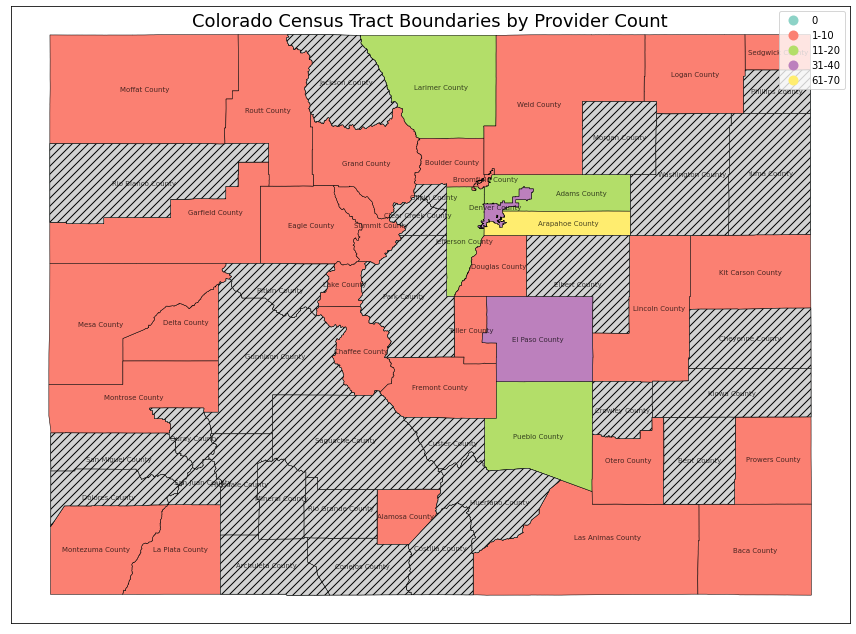

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mergedTableBounds.plot(
    column = 'Provider Count Bin', 
    ax = ax, 
    cmap='Set3', 
    edgecolor='black', 
    linewidth=0.5,
    legend = True,
    categorical = True,
    )

zerosBin = mergedTableBounds[mergedTableBounds['Provider Count Bin'] == '0']
zerosBin.plot(
    ax = ax,
    color='lightgrey',
    edgecolor='black',
    linewidth=0.5,
    hatch='///',
    label='0 Hospice Providers'
)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
   
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.text(
    x=(xlim[0] + xlim[1]) / 2,
    y=ylim[1] * 0.999,
    s=f"Colorado Census Tract Boundaries by Provider Count",
    fontsize=18,
    ha='center',
    va='top',
    backgroundcolor='white',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
)

countyShape = mergedTableBounds.dissolve(by = 'County Name', as_index = False)
countyShape['labelPoint'] = countyShape.geometry.representative_point()

for idx, row in countyShape.iterrows():
    pt = row['labelPoint']
    ax.text(pt.x, pt.y,
        s = row['County Name'],
        ha = 'center',
        va = 'center',
        fontsize  = 7,
        color = 'black',
        alpha = 0.7
    )

zeroPatch = mpatches.Patch(
    facecolor = 'lightgrey',
    edgecolor = 'black',
    hatch = '///',
    label = '0 Hospice Providers'
)


plt.tight_layout()
plt.show()

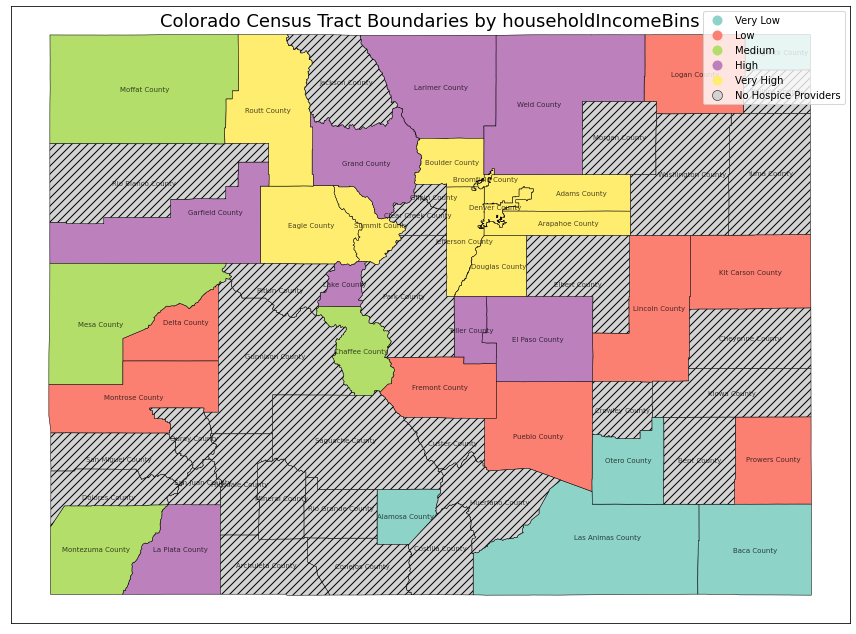

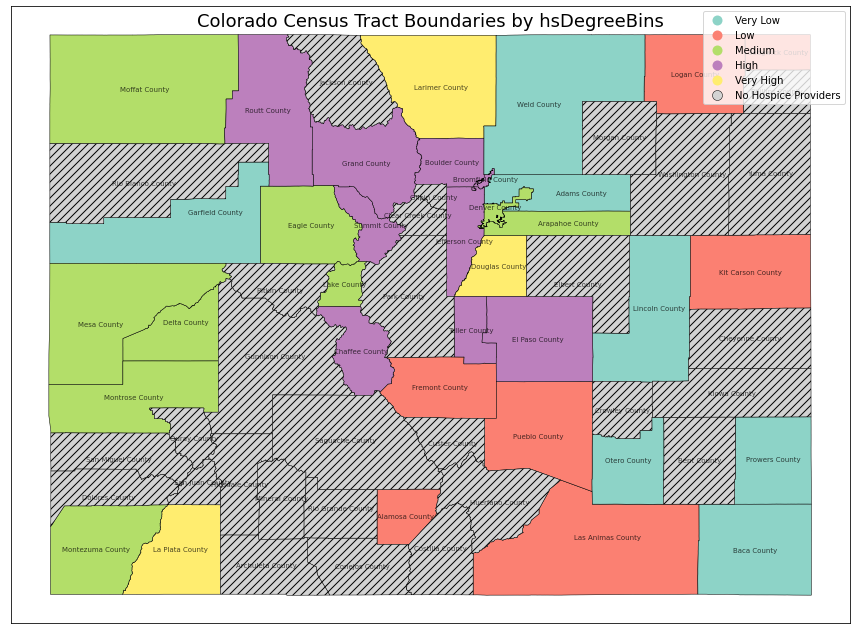

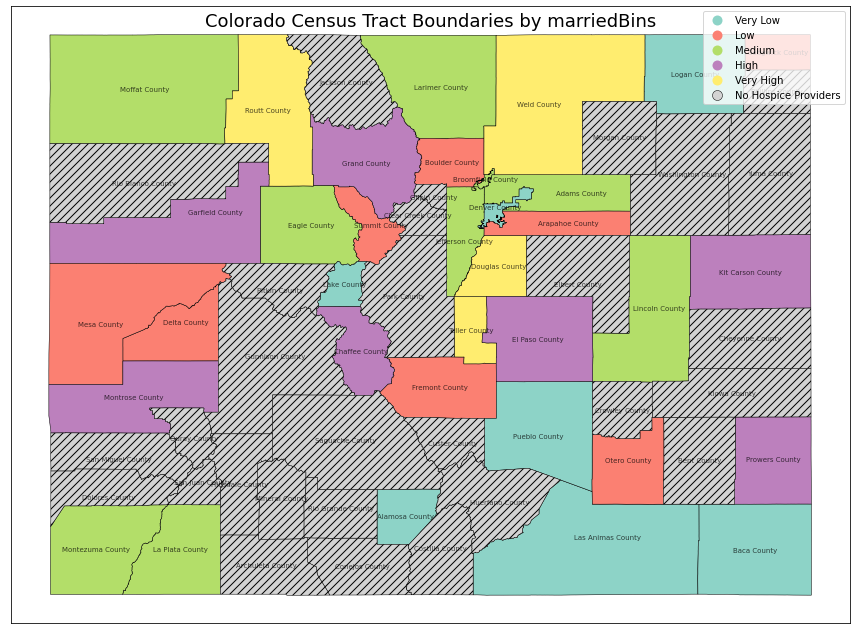

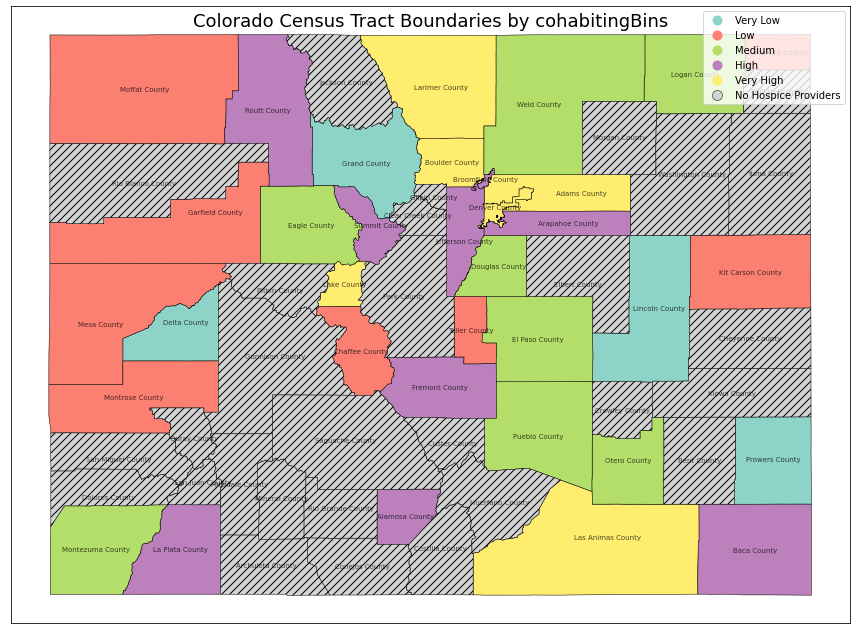

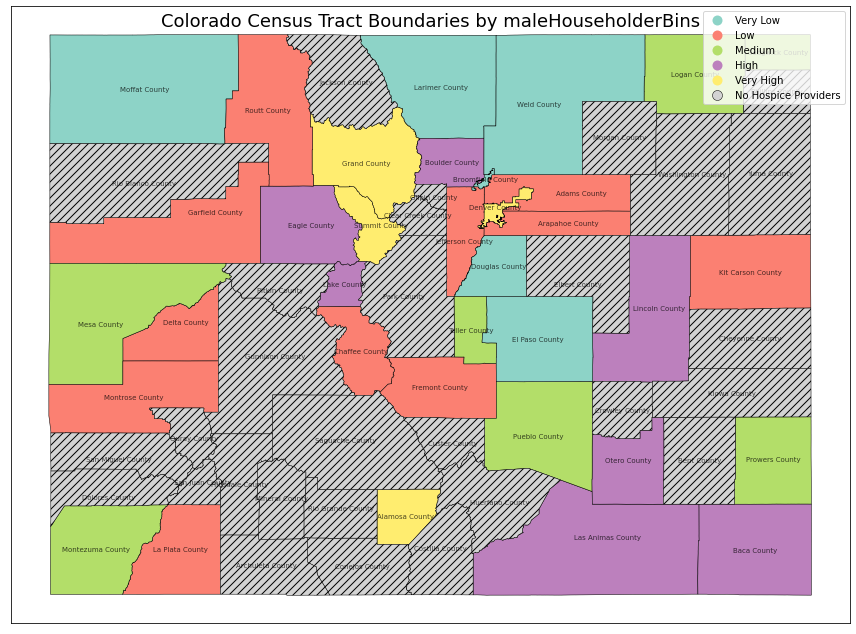

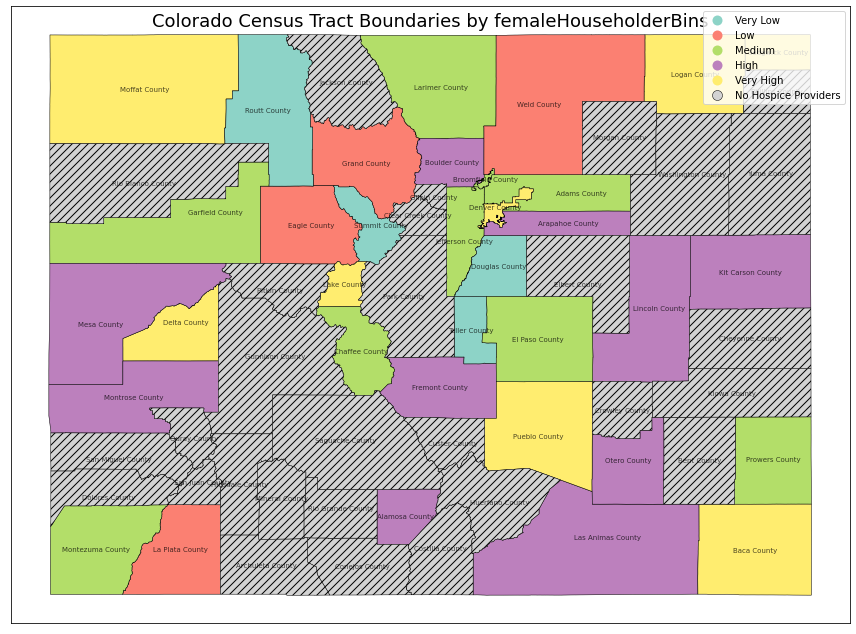

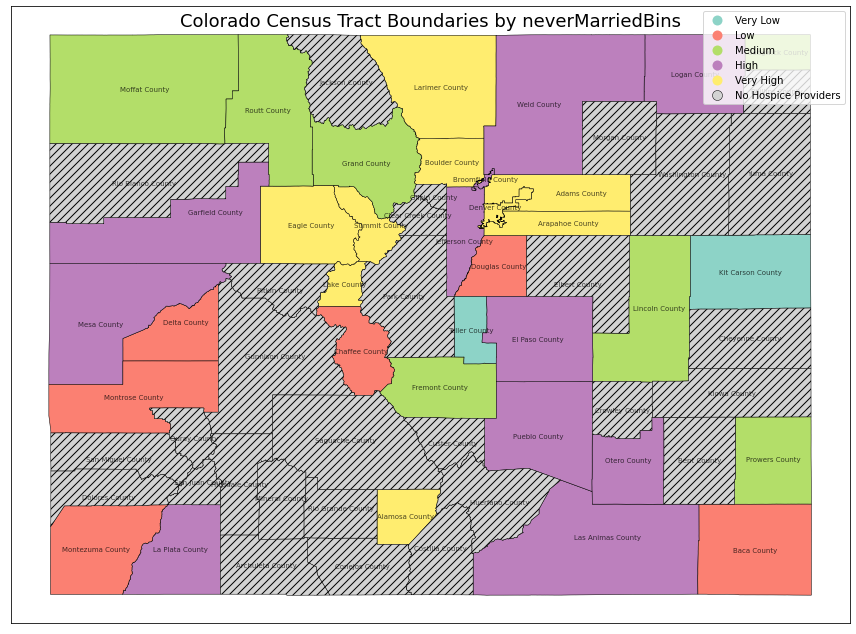

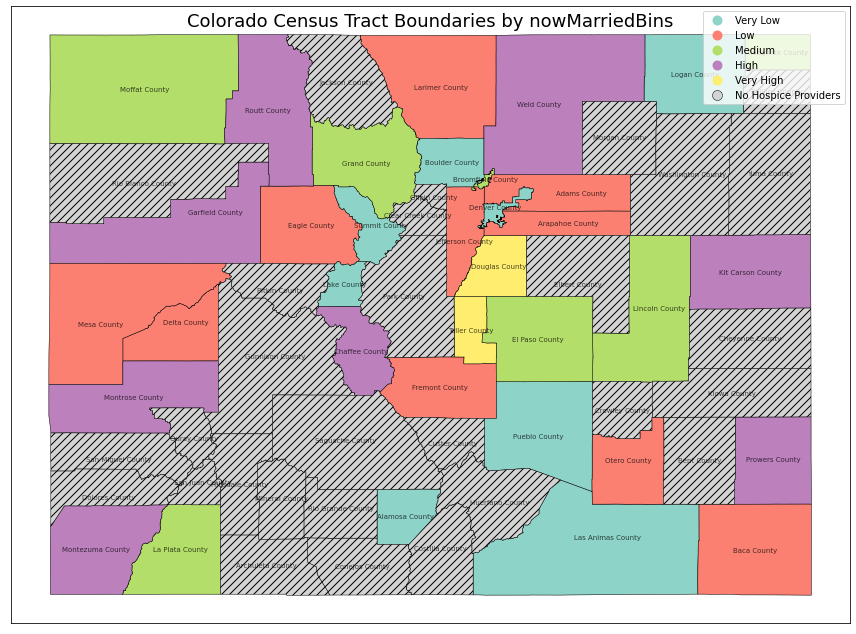

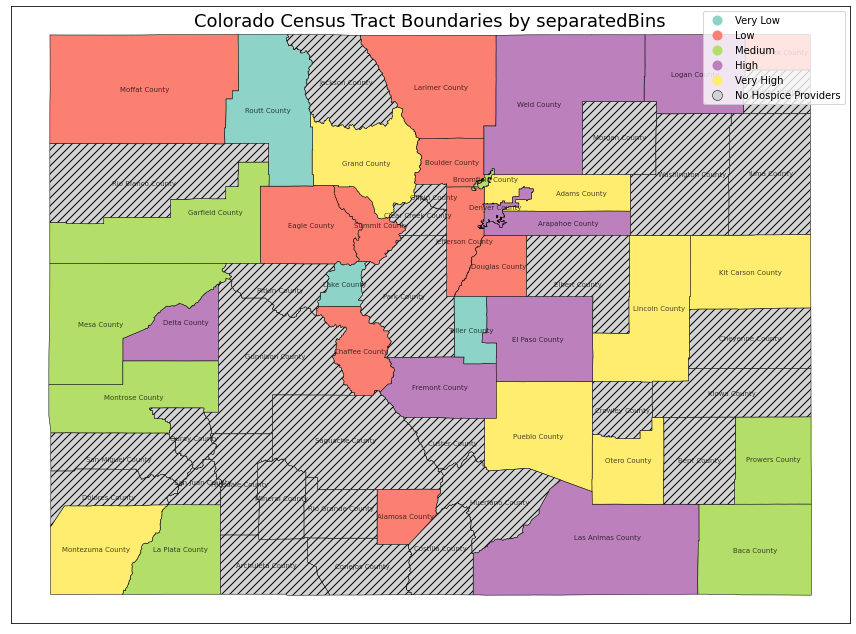

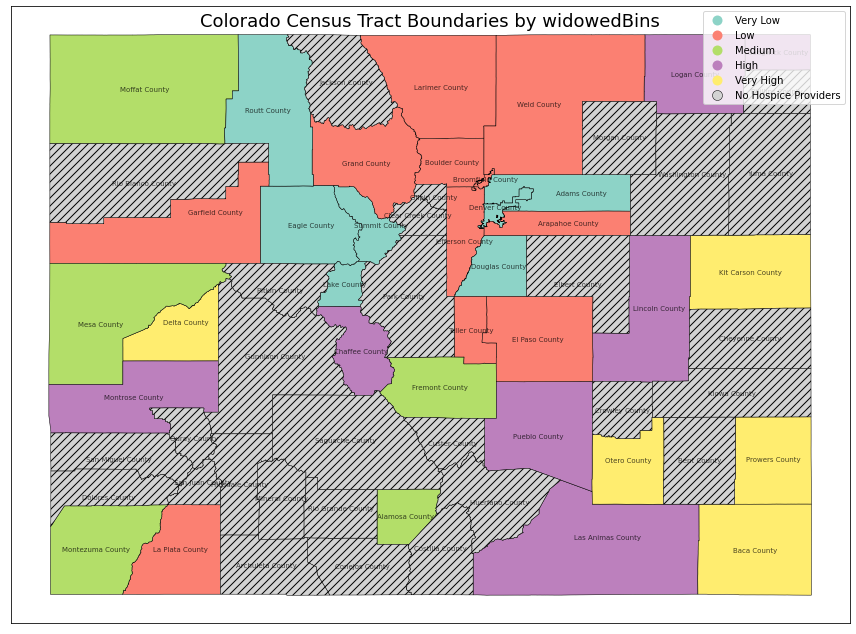

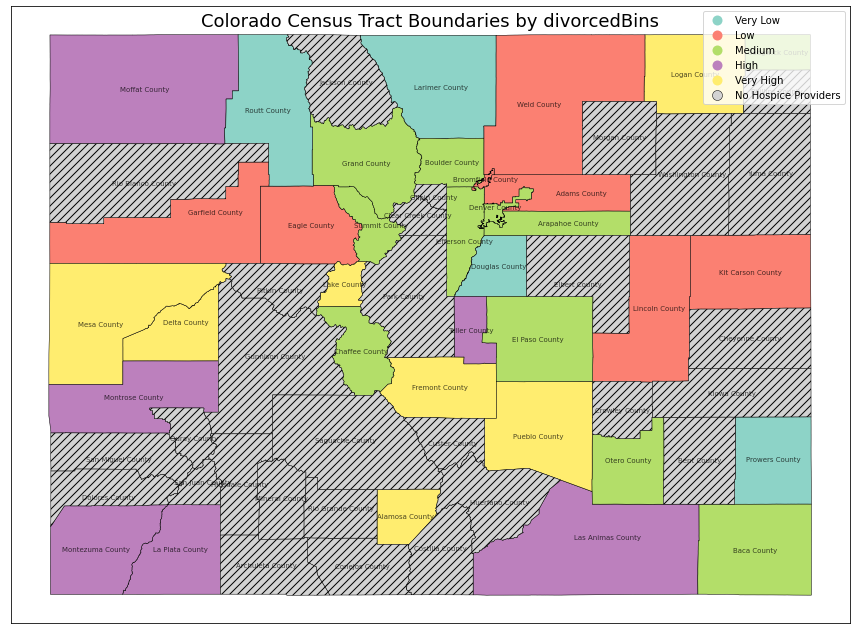

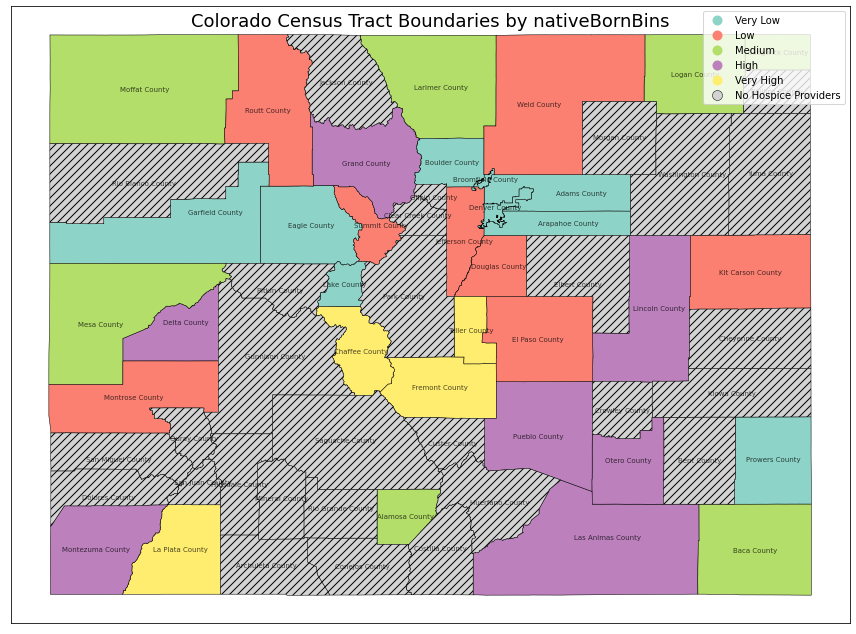

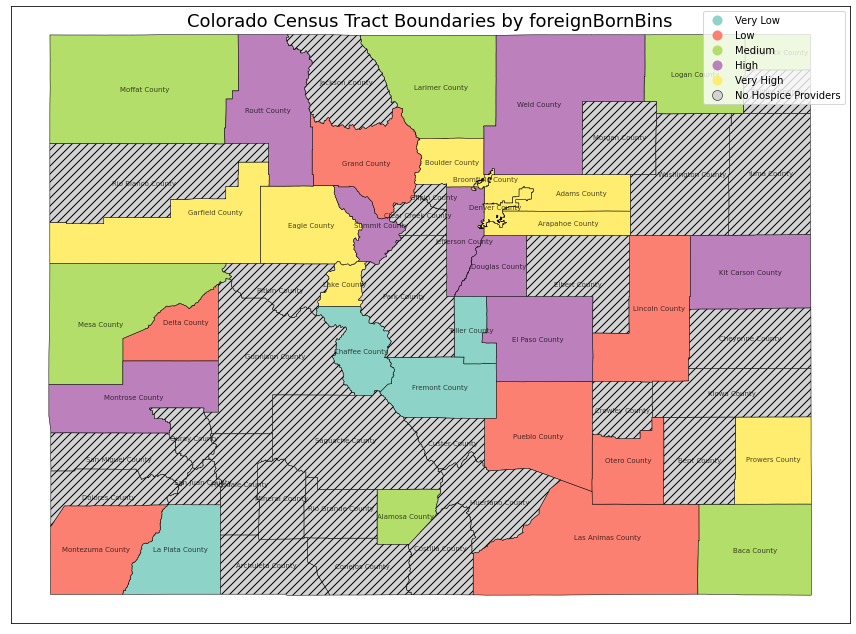

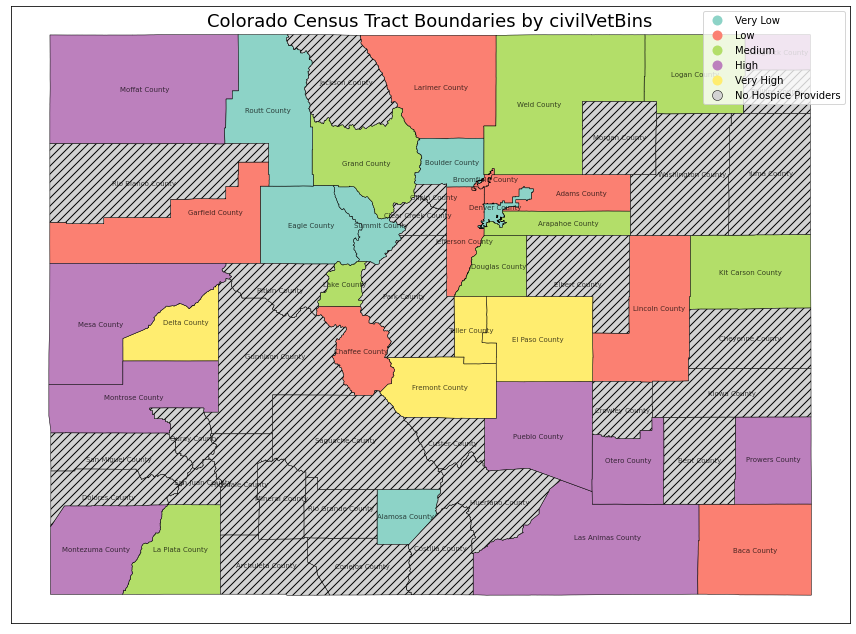

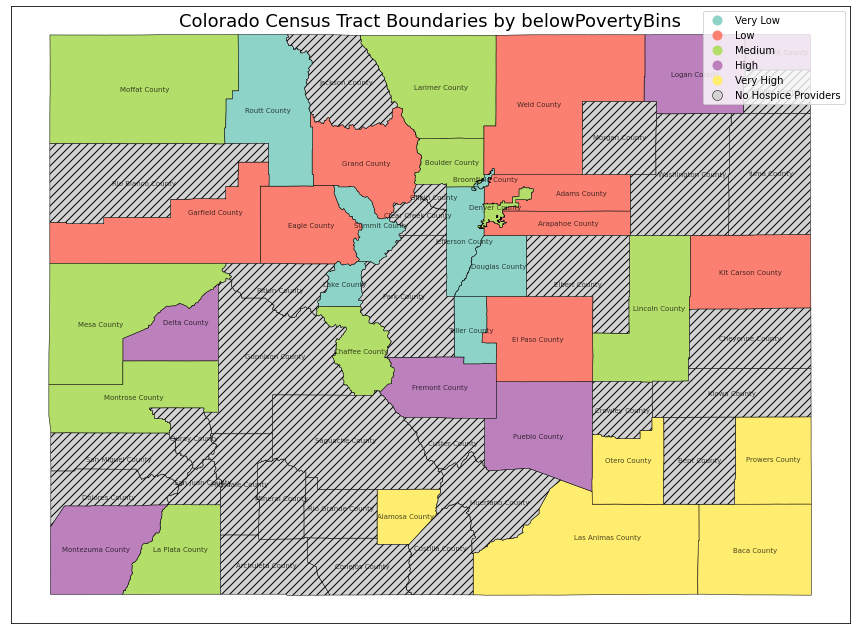

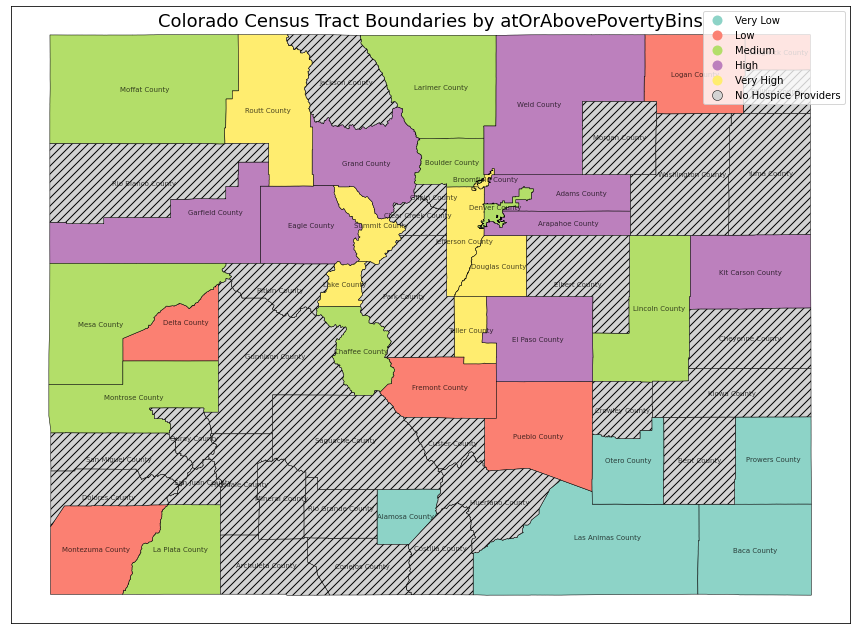

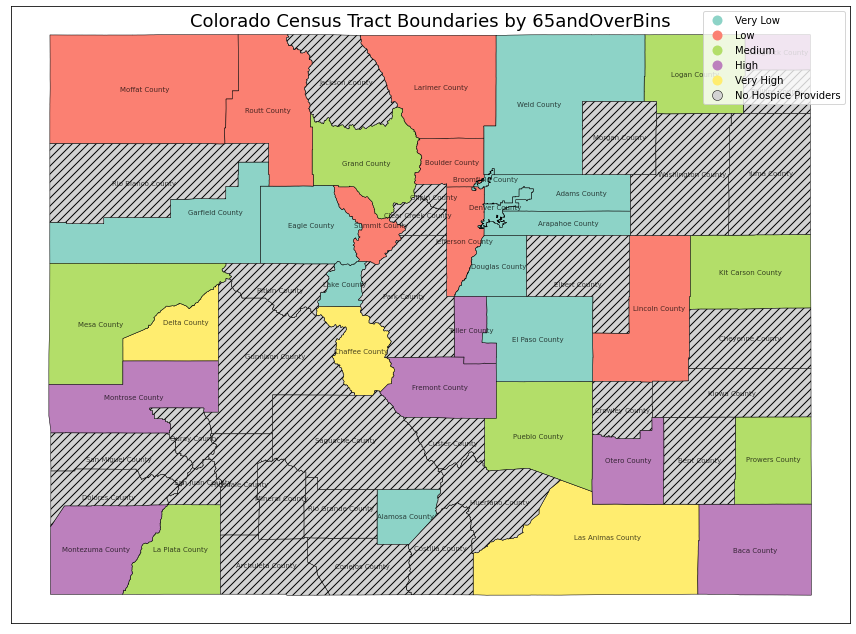

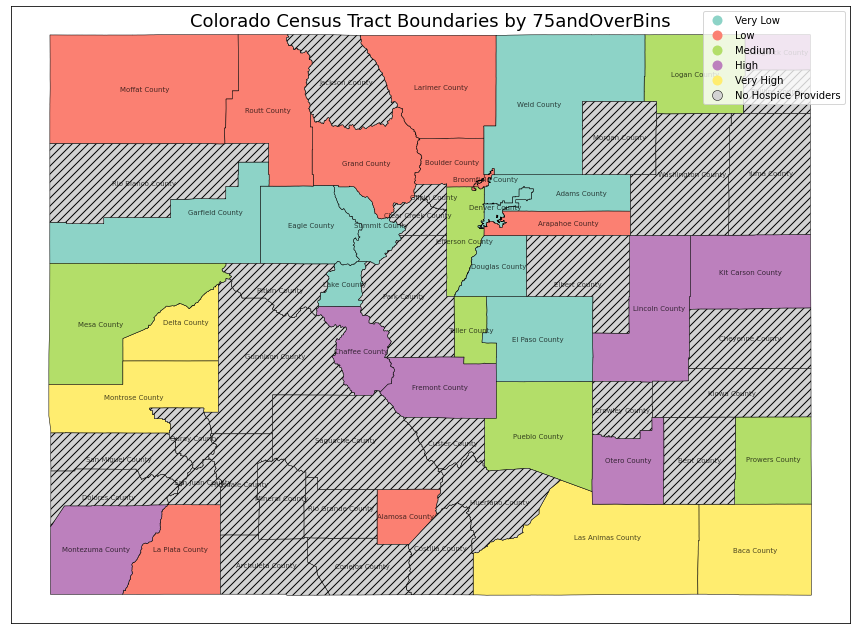

In [38]:
for col in binColumns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    mergedTableBounds.plot(
        column = col, 
        ax = ax, 
        cmap='Set3', 
        edgecolor='black', 
        linewidth=0.5,
        legend = True,
        categorical = True,
        missing_kwds = {
            "color": "lightgrey",     
            "edgecolor": "black",     
            "hatch": "///",
            "label": "No Hospice Providers"
        })

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
   
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.text(
        x=(xlim[0] + xlim[1]) / 2,
        y=ylim[1] * 0.999,
        s=f"Colorado Census Tract Boundaries by {col}",
        fontsize=18,
        ha='center',
        va='top',
        backgroundcolor='white',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
    )


    for idx, row in countyShape.iterrows():
        pt = row['labelPoint']
        ax.text(pt.x, pt.y,
            s = row['County Name'],
            ha = 'center',
            va = 'center',
            fontsize  = 7,
            color = 'black',
            alpha = 0.7
        )

    plt.tight_layout()
    plt.show()